In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_score
import sys 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pandas

In [2]:
dataset = pandas.read_csv('../dataset_norm.csv', delimiter=',').sort_values(by='move_type')

In [3]:
dataset.head()

,move_type,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_-10,d_-9,d_-8,d_-7,d_-6,d_-5,d_-4,d_-3,d_-2,d_-1
150,GO,2.170722e-16,1,0.384187,0.208813,0.216921,0.038474,0.110350,0.082350,0.097247,...,0.009643,0.048340,0.023341,0.128363,0.092402,0.060743,0.192700,0.030283,0.082370,0.066994
206,GO,1.849303e-16,1,0.318827,0.142795,0.089916,0.028816,0.116524,0.096799,0.066367,...,0.038999,0.037991,0.031443,0.057793,0.117156,0.110077,0.142238,0.076322,0.082293,0.120068
205,GO,2.640244e-16,1,0.252896,0.102374,0.027737,0.034839,0.062714,0.102908,0.059627,...,0.040863,0.019640,0.059791,0.043802,0.119923,0.051821,0.097050,0.069223,0.102702,0.170406
204,GO,2.730378e-16,1,0.327660,0.102242,0.027937,0.032844,0.111945,0.120641,0.036026,...,0.017423,0.021744,0.040593,0.011396,0.154387,0.088928,0.064369,0.077308,0.095720,0.182527
203,GO,3.719606e-16,1,0.357169,0.143961,0.071896,0.071706,0.130099,0.074283,0.085000,...,0.005645,0.004887,0.047136,0.067699,0.116815,0.142041,0.080959,0.091715,0.048963,0.155147


In [4]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=42)

# K-Means clustering

In [6]:
n_clusters = 134
score = []
validation = []
for i in range(2,n_clusters):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    score.append(kmeans.score(X_test, y_test))
    validation.append(kmeans.score(X_train, y_train))


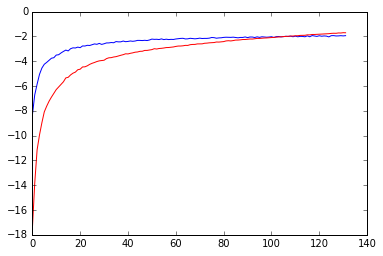

In [7]:
plt.plot(score)
plt.plot(validation, 'r')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=100, random_state=0, max_iter=10000).fit(X_train)

In [9]:
kmeans.cluster_centers_.shape

(100, 51)

In [10]:
belong_to = kmeans.predict(features.values)
print(belong_to[:49])
print(belong_to[50:99])
print(belong_to[100:149])
print(belong_to[150:199])

[96 36 71 94 70 83 82 98  0 60 60 60 60 34 34 83 36 36 94 42 42 42 62 35 70
 28 42 62 46 51 63 42 35 28 30 70 11 30 69 42 42 87 94 11 35 68 98  7 87]
[87 39 68 35 87 34 89 34 44 44 44 30 34 34 30 34 34 34 91 94 91 81 79 70 36
 86 86  8 36 62 22 86 17  8 23 23 23 97  8 17 51 51 51 44 11 30 34 34 44]
[11 44 11 11 44 44 34 44 97 42 46 76 63 89 89 34  2 89 36 62  2 24 61 42 24
  0 89 86 85 71 23 23 23 46 46 28 28 28 17 63 89 89  2 42 36 35 98 34 69]
[63 63 63 63 63 63  8 69 70 63 70 81 35 81 81 87 81 81 87 78 56 14 50 35 51
 39 51 86 35 46 23 46 23 23 46 46 56 46 46 89 71 97 56 62 51 73 70  8 86]


In [11]:
def reconstruct(descriptors):
    """ reconstruct the image using the normalized descriptors and plot it
        Keyword arguments: 
         - descriptors : the normalized fourier descriptors
    """
    contour_reconstruct = np.fft.ifft(descriptors)
    contour_reconstruct = np.array(
        [contour_reconstruct.real, contour_reconstruct.imag])
    contour_reconstruct = np.transpose(contour_reconstruct)
    contour_reconstruct = np.expand_dims(contour_reconstruct, axis=1)
    # make positive
    if contour_reconstruct.min() < 0:
        contour_reconstruct -= contour_reconstruct.min()
    # normalization
    contour_reconstruct *= 800 / contour_reconstruct.max()
    # type cast to int32
    contour_reconstruct = contour_reconstruct.astype(np.int32, copy=False)
    black = np.zeros((800, 800), np.uint8)
    # draw and visualize
    cv2.drawContours(black, contour_reconstruct, -1, 255, thickness=-1)
    cv2.imshow("black", black)
    cv2.waitKey(10000)
    cv2.imwrite("reconstruct_result.jpg", black)
    cv2.destroyAllWindows()

# KNN clustering

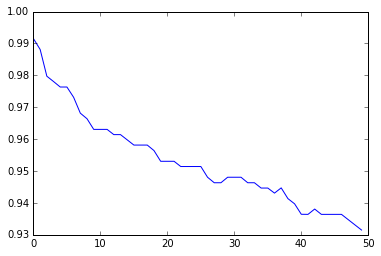

In [14]:
# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(cv_scores)
plt.show()

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train,y_train ) 

In [42]:
knn_belong_to = knn_classifier.predict(features.values)

In [43]:
test_prediction = knn_classifier.predict(X_test)

In [44]:
missclassified = 0
for i in range(len(y_test)):
    if y_test[i] != test_prediction[i]: 
        missclassified = missclassified +1
print(missclassified)

3


## Feedforward Neural Network 

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',
                     hidden_layer_sizes=(41), random_state=1, 
                     max_iter = 10000, early_stopping=True)

clf.fit(X_train,y_train)                         
test_fnn_prediction = clf.predict(X_test)
test_fnn_overfit = clf.predict(X_train)

In [12]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != test_fnn_prediction[i]: 
        print("{} missclassified as {}".format(y_test[i], test_fnn_prediction[i]))
        count +=1
        
print(count/len(y_test)*100)


0.0


In [13]:
for i in range(len(y_train)):
    if y_train[i] != test_fnn_overfit[i]: 
        print("{} missclassified as {}".format(y_train[i], test_fnn_overfit[i]))
        count +=1
        
print(count/len(y_train)*100)

0.0


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_fnn_prediction)

array([[78,  0,  0,  0],
       [ 0, 82,  0,  0],
       [ 0,  0, 62,  0],
       [ 0,  0,  0, 75]])